# Graf zależności między dziedzinami nauki

Graf przedstawia powiązania między różnymi dziedzinami nauki, takimi jak nauki formalne, przyrodnicze, społeczne oraz stosowane, na podstawie artykułów ze strony Wikipedia (angielska wersja). Węzły reprezentują konkretne dziedziny, a krawędzie wskazują na ich tematyczne i metodologiczne podobieństwa, obliczone przy użyciu miary kosinusowej (z-score > 1.96). Dane zostały przetworzone, usuwając izolowane węzły, słowa stop oraz przeprowadzając lematyzację  z użyciem WordNetLemmatizer. Powyższe informacje napisałem na podstawie opisu danych jakie zostały zawarte w pliku.    

Dane pochodzą ze źródła: https://networks.skewed.de/net/wiki_science

Dane są w formacie .gml, jednak nie byłem w stanie od razu stworzyć wykresu na ich podstawie, ponieważ zawierały błędy, takie jak powtarzanie się krawędzi i wierzchołków. Nie byłem w stanie obejść tego problemu, więc wcześniej musiałem tę dane wyczyścić, co było dużą trudnością. Nie umieściłem tutaj funkcji dzięki której wyczyściłem te dane, ponieważ jest bardzo duża i nie jest potrzebna w tym zadaniu. Największymi trudnościami były przygotowanie danych i odpowiednie dobieranie parametrów//wielokrotne generowanie grafu, aby osiągnąć zadowaljący efekt. 

Kolorami na grafie oznaczone są kategorie tematyczne do których należą poszczególne artykuły z Wikipedii. Krawędzie między wierzchołkami oznaczają połączenia między konkretnymi artykułami. Wielkość wierzchołków związana jest ze stopniem danego wierzchołka.

In [89]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import random

In [90]:
def create_and_visualize_graph(file_path):
    
    G = nx.read_gml(file_path, label='name')
    
    # Info o grafie
    print(f"Liczba węzłów: {G.number_of_nodes()}")
    print(f"Liczba krawędzi: {G.number_of_edges()}")
    
    # Kolory do dziedzin nauki
    class_colors = {
        "Applied": "orange",  
        "Natural": "blue",  
        "Formal": "green",   
        "Social": "firebrick"    
    }
    

    # Nadawanie kolorów w zaleźności od kategorii
    node_colors = [class_colors[G.nodes[node]['Class']] for node in G.nodes()]
    
    # Wielkości węzłów
    node_sizes = [8 + 5 * G.degree(node) for node in G.nodes()]
    
    # Parametry wykresu
    plt.figure(figsize=(20, 20))

    # Tworzenie ustawienia
    pos = nx.spring_layout(G, k=4/np.sqrt(len(G.nodes())))
    
    # Rysowanie
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.6)
    nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='gray')

    # Legenda i tytuł
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=class_name,
                                 markerfacecolor=color, markersize=10)
                      for class_name, color in class_colors.items()]
    plt.legend(handles=legend_elements,fontsize=14, loc='upper left', title='Areas of science', title_fontsize=16)
    
    
    plt.title("Map of science - connections between fields", pad=20, fontsize=18)

    # Opis
    description = (
        "This graph visualizes connections between different branches of science,\n"
        "based on similarities between Wikipedia articles.\n"
        "Nodes represent scientific fields, categorized into four main areas:\n"
        "Applied, Natural, Formal, and Social sciences.\n"
        "Each edge represent relevant similarity between fields.\n"
    )
    plt.text(0.05, 0.05, description, fontsize=14, wrap=True, 
             verticalalignment='bottom', horizontalalignment='left', transform=plt.gca().transAxes)

    plt.savefig("fields_of_science.png", dpi=300)
    plt.show()
    
    return G

Liczba węzłów: 645
Liczba krawędzi: 5833


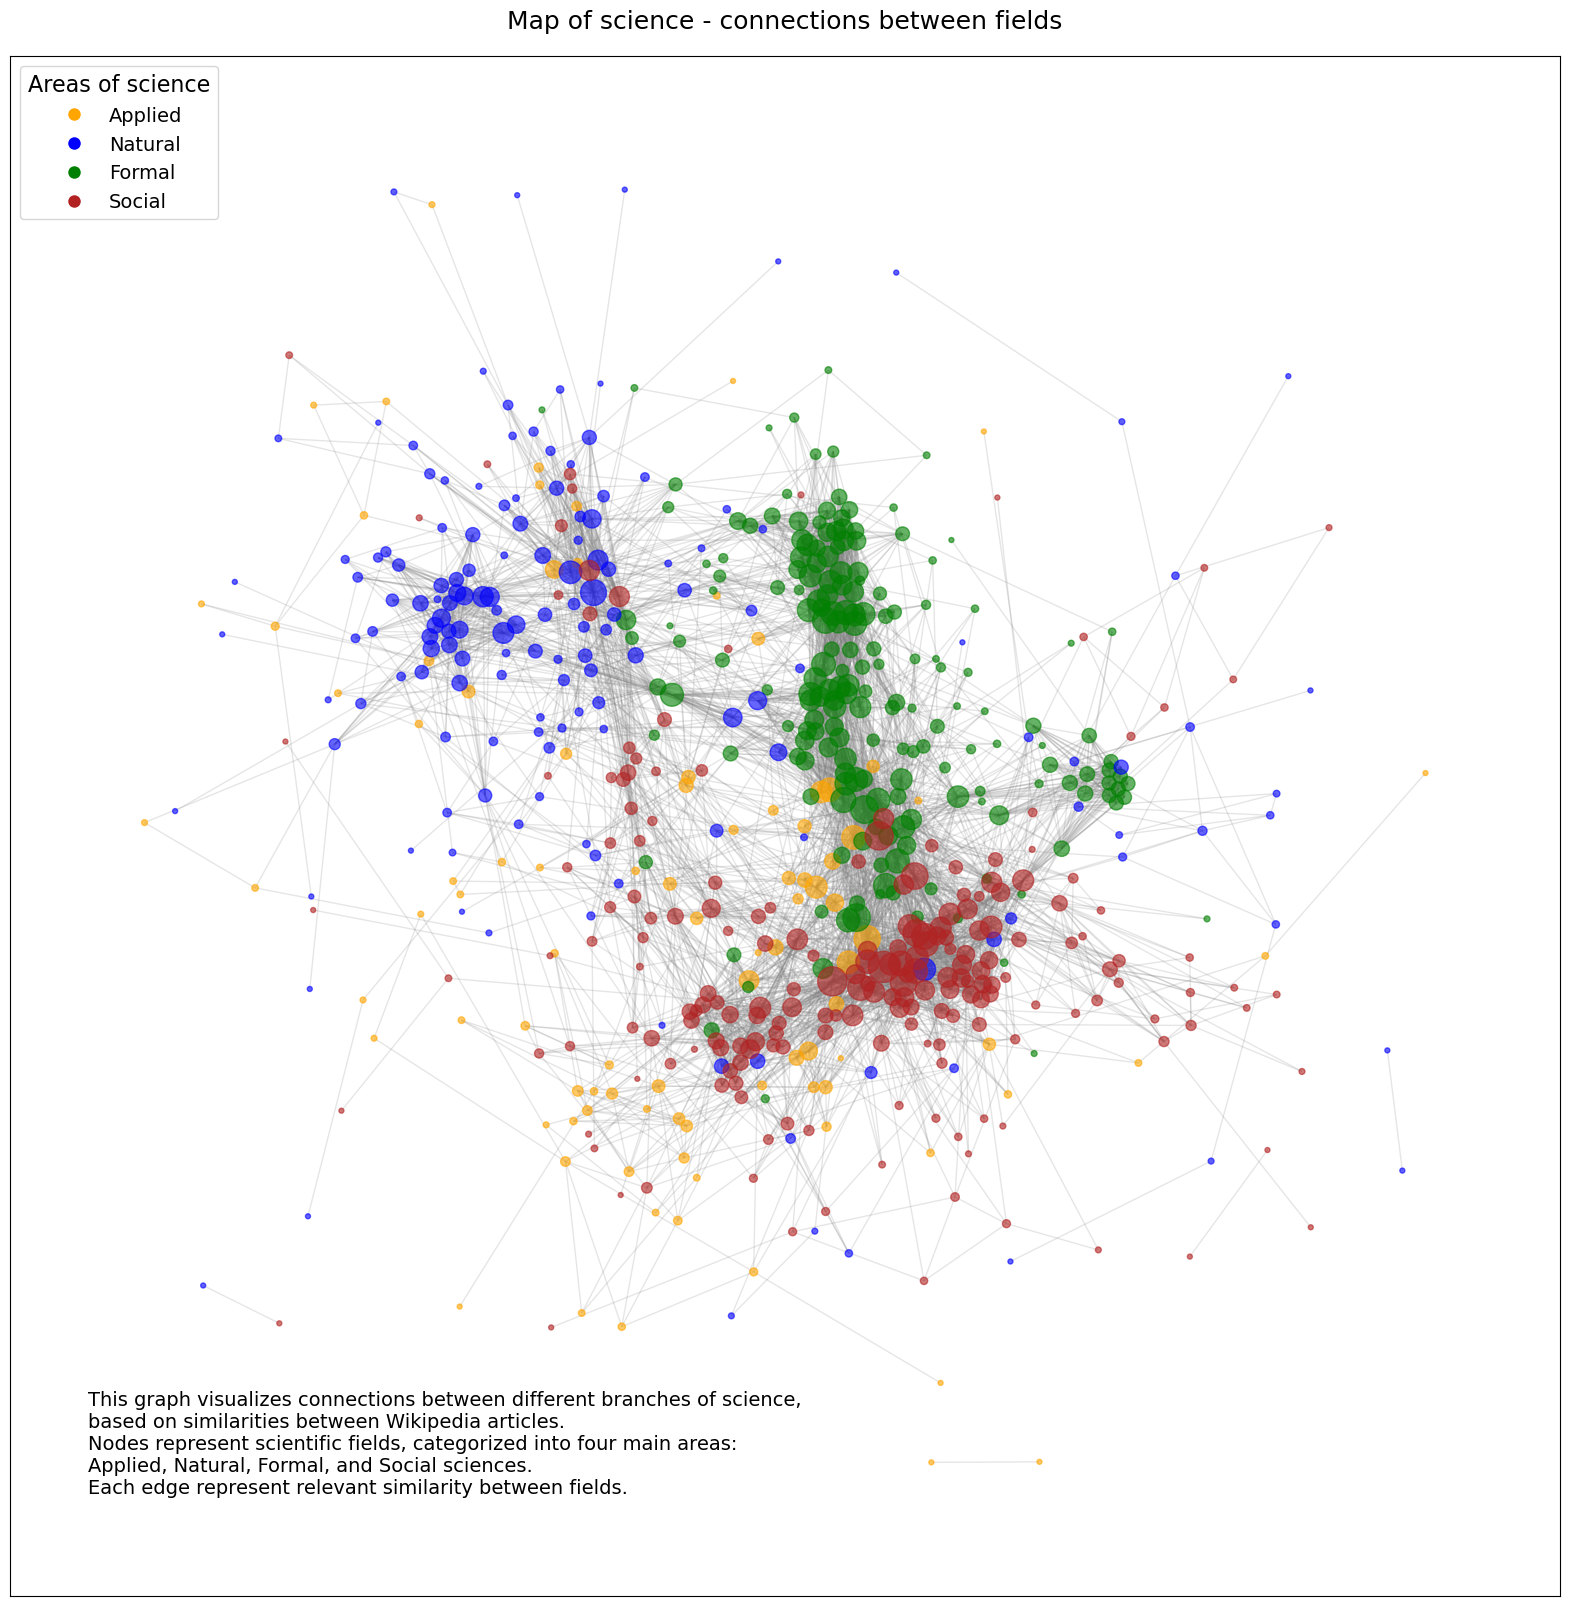

In [91]:
random.seed(42)
np.random.seed(42)
G = create_and_visualize_graph("MapOfScience_no_duplicates.gml")


Wydaje mi się, że najciekawszą rzeczą jaką można zaobserwować na grafie jest występowanie skupisk kolorów. Świadczy to o tym, że dziedziny z tego samego obaszaru nauki są ze sobą bardziej powiązane niż z tymi z innych obszarów, co jest w sumie logiczne. A przy okazji graf fajnie wygląda:)